In [37]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [38]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [39]:
print("Training size:" , X_train.shape)
print("Training size op:" , y_train.shape)
print("Test size:" , X_test.shape)
print("Test size op:" , y_test.shape)

Training size: (50000, 32, 32, 3)
Training size op: (50000, 1)
Test size: (10000, 32, 32, 3)
Test size op: (10000, 1)


In [40]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [41]:
print(y_train[:5])
print(y_test[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]
[[3]
 [8]
 [8]
 [0]
 [6]]


In [42]:
y_train = y_train.reshape(50000,1)
y_test = y_test.reshape(10000,1)

In [43]:
print(y_train[:5])
print(y_test[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]
[[3]
 [8]
 [8]
 [0]
 [6]]


In [44]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [45]:
print(y_train[:5])
print(y_test[:5])

[6 9 9 4 1]
[3 8 8 0 6]


In [46]:
y_train.shape

(50000,)

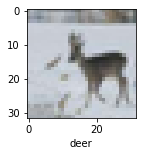

In [47]:
def plot_sample(X, y, index):
    plt.figure(figsize = (20,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(X_train, y_train, 20)

In [48]:
X_train = X_train/255
X_test = X_test/255

In [49]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.8550 - accuracy: 0.3356
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6556 - accuracy: 0.4122
Epoch 3/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.5695 - accuracy: 0.4443
Epoch 4/5
1563/1563 [==============================] - 121s 78ms/step - loss: 1.5070 - accuracy: 0.4689
Epoch 5/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4594 - accuracy: 0.4838


In [50]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [52]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3576 - accuracy: 0.5151
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1009 - accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9936 - accuracy: 0.6557
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9236 - accuracy: 0.6801
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8602 - accuracy: 0.7014
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8130 - accuracy: 0.7167
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7643 - accuracy: 0.7359
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7268 - accuracy: 0.7480
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6884 - accuracy: 0.7607
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [55]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9703 - accuracy: 0.6852


[0.9702721834182739, 0.6851999759674072]

In [56]:
y_pred = cnn.predict(X_test)
y_pred[:10]

array([[2.3339535e-03, 9.7169999e-05, 6.2184175e-03, 4.2546815e-01,
        6.8819063e-05, 6.1369982e-02, 1.3948347e-03, 3.6932554e-06,
        5.0295120e-01, 9.3860821e-05],
       [4.9152197e-03, 1.0223644e-01, 6.8343829e-06, 3.7916710e-05,
        6.1400499e-07, 6.5973961e-07, 5.5837667e-08, 3.7408407e-07,
        8.7366563e-01, 1.9136218e-02],
       [5.8353603e-02, 5.9007723e-02, 5.3167534e-03, 2.9746553e-02,
        1.7894834e-02, 2.3185832e-03, 2.0752293e-04, 1.2124495e-02,
        4.2948526e-01, 3.8554475e-01],
       [7.8759402e-01, 2.1262985e-02, 5.1251795e-02, 1.9263437e-02,
        2.1677041e-02, 2.5927025e-05, 2.6611303e-04, 1.6620831e-04,
        9.8094903e-02, 3.9748289e-04],
       [8.8702263e-06, 3.1166819e-05, 1.2732536e-01, 5.4824267e-02,
        1.2269068e-01, 2.8442196e-03, 6.9205731e-01, 2.8101185e-05,
        1.8085713e-04, 9.1601714e-06],
       [3.1239967e-04, 7.3324470e-04, 1.4153005e-02, 3.3717792e-02,
        2.3320721e-02, 2.6324980e-02, 8.9811230e-01, 1.83

In [57]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[8, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [59]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

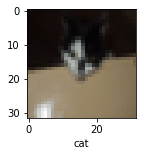

In [64]:
plot_sample(X_test, y_test, 121)

In [65]:
classes[y_classes[121]]

'bird'